(1000, 256)
1
(1000, 256)
()


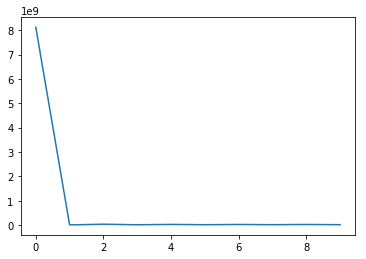

3705.860477089313
92636.4328497367


'\nfor i in range(1000):\n    sub = Z[:,i] - comp[i,:].T\n    norm = np.linalg.norm(sub)\n    diff.append(norm)\nprint(diff)\n'

In [3]:
import numpy as np 
import sklearn 
import matplotlib.image as img
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import SparseCoder
import spams

#A method to calculate U
def calculateU(Z, epsilon): 
    U = np.empty((np.shape(Z)[0], np.shape(Z)[1]))
    for i in range(np.shape(Z)[0]): 
        for k in range(np.shape(Z)[1]):
            if abs(Z[i,k]) > epsilon:
                U[i,k] = abs(Z[i,k])
                continue
            else: 
                U[i,k] = epsilon 
                continue
    return U

#A method to calculate Z
def calculateZ(V,W,lamb,x):
    Z = np.empty((350,1000))
    for i in range(1000): 
        U = np.diag(V[:,i])
        A = np.linalg.inv((np.matmul(W,W.T))+lamb*U)
        B = np.matmul(W,x[i,:].T)
        Z[:,i] = np.matmul(A,B)
    return Z

#A method to calculate the energy function for the majorization algorithm
def energy(x,W,z,lam): 
    result = 0 
    first = 0
    second = 0 
    for i in range(1000):
        first = first + np.linalg.norm(x[i,:] - np.matmul(W.T,z[:,i]))**2
        second = second + np.linalg.norm(z[:,i],1)
    result = first + lam*second 
    return result

#Read in the image 
imag = img.imread('clockwork-angels.jpg')

#Extract the R-Channel
R = imag[:,:,0]
R.astype(float)

#Create 16x16 patches
patches = image.extract_patches_2d(R, (16,16))
index = random.sample(range(1, 5000), 1000)
matrix = np.empty((1000,256))
i = 0;
for number in index: 
    vec = patches[number].reshape(256)
    matrix[i,:] = vec
    i = i + 1

pca = PCA()
p = pca.fit_transform(matrix)
print(np.shape(p))
print(1)
pca2 = PCA(n_components = 64) 
p2 = pca.fit_transform(matrix)
print(np.shape(p2))
#Compute the dictionary W for the 1000 patches
dictionary = MiniBatchDictionaryLearning(n_components = 350)
comp_dict = dictionary.fit(matrix)
W = dictionary.components_ 
print(np.shape(comp_dict))
#Majorization algorithm 
U = np.ones((350,1000))
Z_old = np.zeros((350,1000))
Z = np.zeros((350,1000))
E = energy(matrix,W,Z,1)
y = []

for i in range(10):
    y.append(E)
    U = calculateU(Z_old, 0.001)
    Z = calculateZ(U,W,0.01,matrix)
    E_new = energy(matrix, W, Z,1)
    if abs(E_new - E) < 0.01: 
        break
    else: 
        Z_old = Z 
        E = E_new
        continue

plt.plot(y)
plt.show()

#Compare the SparseCoder and the Dictionary from majorization

comp_dict = np.matmul(W.T,Z).T
dict_learn = np.linalg.norm(abs(comp_dict - matrix))
pca_learn = np.linalg.norm(abs(p-matrix))

print(dict_learn)
print(pca_learn)
diff = []
'''
for i in range(1000):
    sub = Z[:,i] - comp[i,:].T
    norm = np.linalg.norm(sub)
    diff.append(norm)
print(diff)
'''